In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
connection = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the data to make sure the session connection is working
session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).order_by(measurement.id).all()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [11]:
# Display the station table
session.query(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation).order_by(station.id).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 (7,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 (8,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:
# setup an inspector
inspector = inspect(engine)

In [13]:
# create the measurement dataframe from the measurement table
measurement_df = pd.read_sql('SELECT * FROM measurement',connection)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [14]:
# create the station dataframe from the measurement table
station_df = pd.read_sql('SELECT * FROM station',connection)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [15]:
import datetime as dt

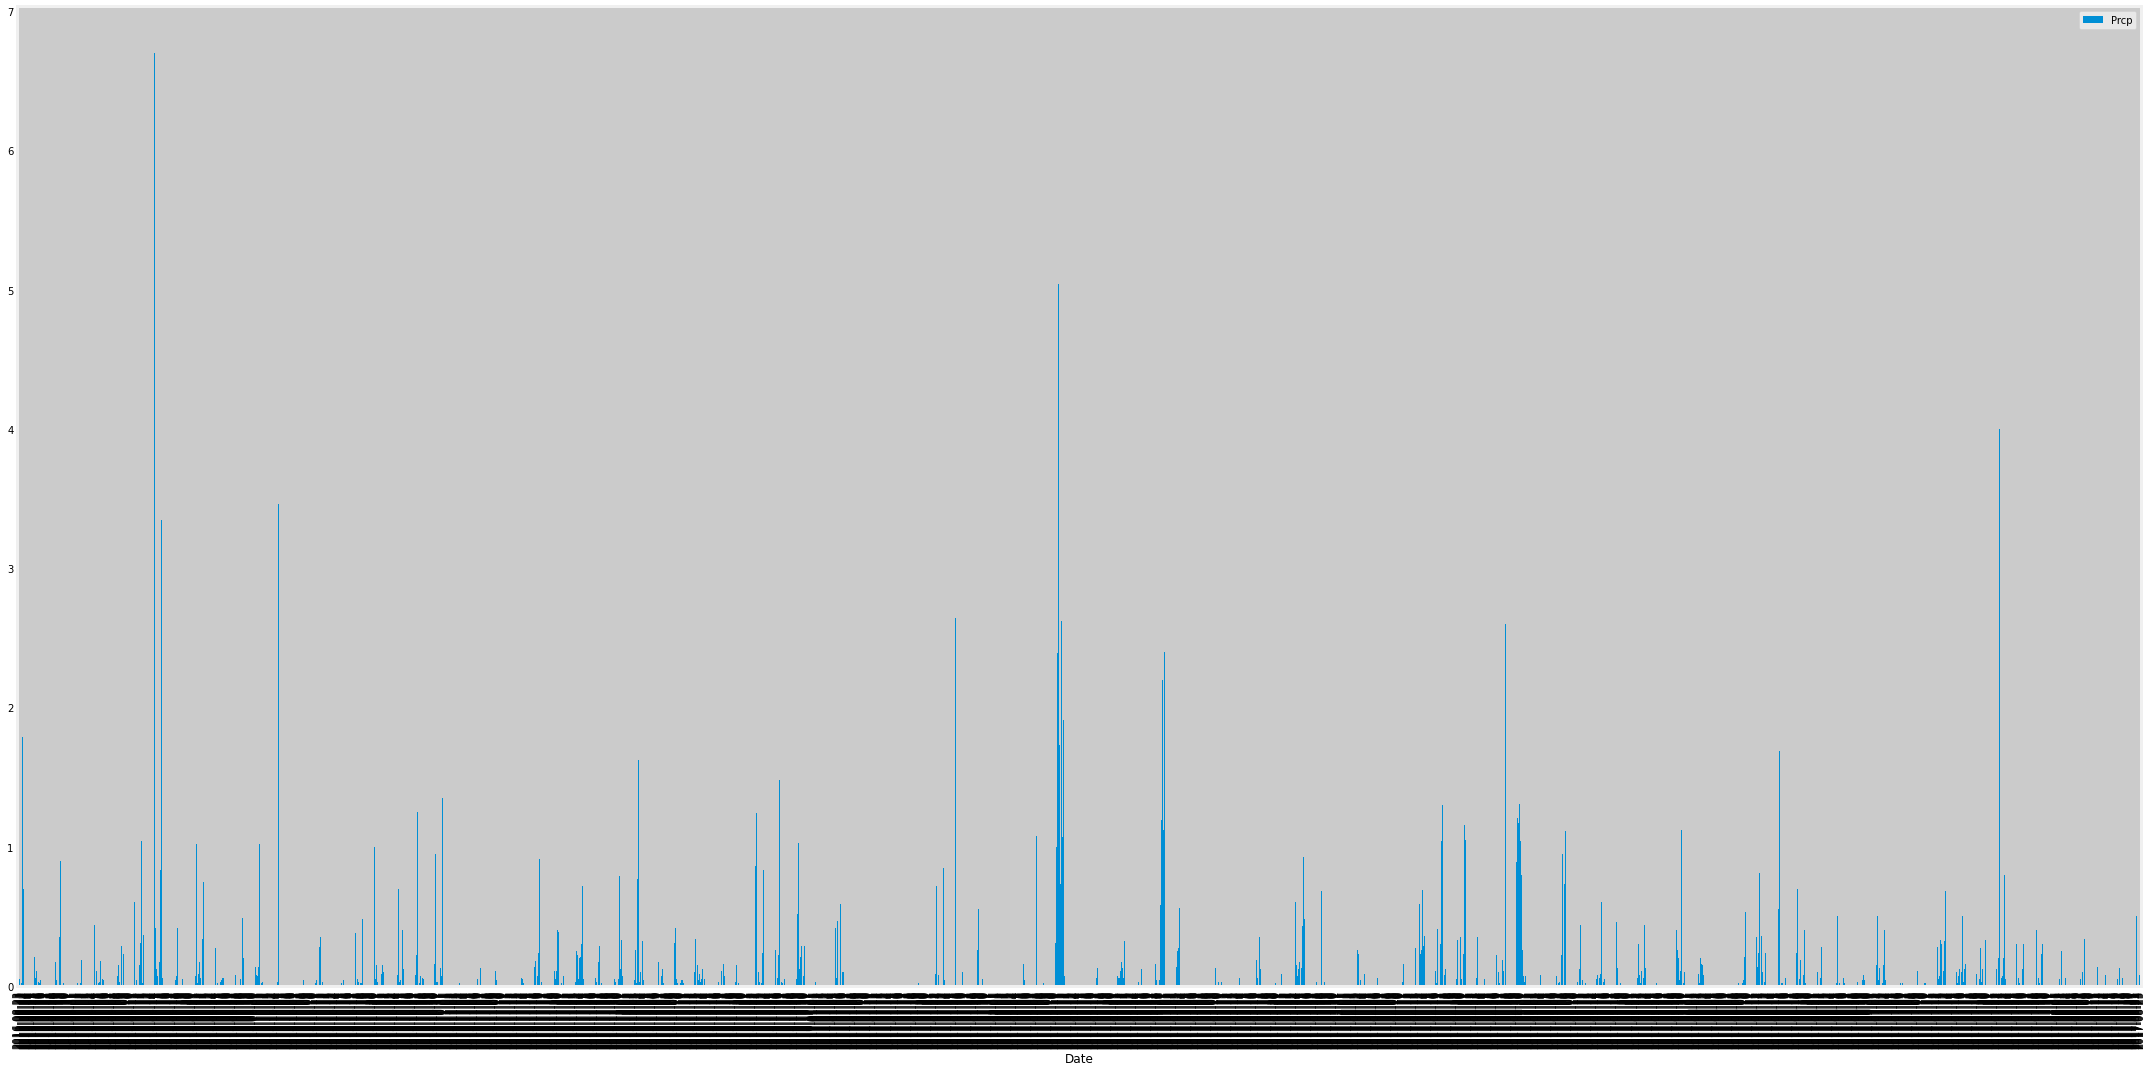

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database (2016-8-23 to 2017-08-23)

# Perform a query to retrieve the data and precipitation scores
last_one_year = session.query(measurement.date, measurement.prcp).\
                filter(measurement.date <= '2017-08-23' ).\
                filter(measurement.date >= '2016-08-23').\
                order_by(measurement.date).\
                all()
last_one_year

# Save the query results as a Pandas DataFrame and set the index to the date column()
# Sort the dataframe by date
df = pd.DataFrame(last_one_year, columns=['Date', 'Prcp'])
df.set_index("Date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
bar_chart = df.plot(kind="bar", figsize=(30,15))
plt.tight_layout()
plt.show()

#================================================================QUESTION=======================

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [18]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(measurement.station).distinct(measurement.station).count()
print(f"There are total {station_count} stations in this database")

There are total 9 stations in this database


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_summary = session.query(measurement.station, func.count(measurement.station)).\
                group_by(measurement.station).\
                order_by(func.count(measurement.station).desc()).\
                all()
station_summary

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_temp = session.query(measurement.station, func.min(measurement.tobs)).\
                group_by(measurement.station).\
                filter(measurement.station == "USC00519281").\
                all()
lowest_temp

[('USC00519281', 54.0)]

In [21]:
highest_temp = session.query(measurement.station, func.max(measurement.tobs)).\
                group_by(measurement.station).\
                filter(measurement.station == "USC00519281").\
                all()
highest_temp

[('USC00519281', 85.0)]

In [22]:
average_temp = session.query(measurement.station, func.avg(measurement.tobs)).\
                group_by(measurement.station).\
                filter(measurement.station == "USC00519281").\
                all()
average_temp

[('USC00519281', 71.66378066378067)]

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_year_temp = session.query(measurement.date, measurement.tobs).\
                filter(measurement.date <= '2017-08-23' ).\
                filter(measurement.date >= '2016-08-23').\
                filter(measurement.station == 'USC00519281').\
                all()

Text(0, 0.5, 'Frequency')

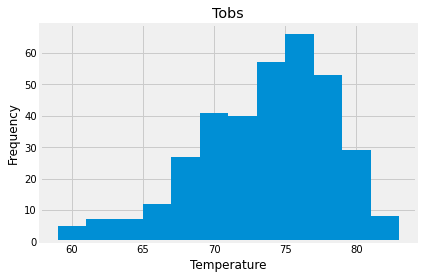

In [24]:
temp_df = pd.DataFrame(last_year_temp, columns=['Date','Tobs'])
temp_df.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")


## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Statistical analysis
from scipy import stats
from numpy import mean

In [27]:
#=====================Temperature Analysis I ================

#Identify the average temperature in June at all stations across all available years in the dataset. 
#Do the same for December temperature.

#---June average temp for each station across all avaliable years


In [28]:
june_temp = session.query(func.avg(measurement.tobs)).\
                filter(func.strftime("%m", measurement.date) == "06").\
                group_by(measurement.station).\
                all()
mean(june_temp)

74.85351018249018

In [29]:
#---June average temp for all station across all years
june_avg_temp = session.query(func.avg(measurement.tobs)).\
                filter(func.strftime("%m", measurement.date) == "06").\
                all()
print(f"The june average temp across all station and all years is {june_avg_temp}")

The june average temp across all station and all years is [(74.94411764705882,)]


In [30]:
#---December average temp for each station across all avaliable years

In [31]:
dec_temp = session.query(func.avg(measurement.tobs)).\
                filter(func.strftime("%m", measurement.date) == "12").\
                group_by(measurement.station).\
                all()
mean(dec_temp)


71.21907046377945

In [32]:
#---June average temp for all station across all years
dec_avg_temp = session.query(func.avg(measurement.tobs)).\
                filter(func.strftime("%m", measurement.date) == "12").\
                all()
print(f"The december average temp across all station and all years is {dec_avg_temp}")

The december average temp across all station and all years is [(71.04152933421226,)]


In [33]:
# Unpaired (independent) t-test   ===========================QUESTIONS===========================
stats.ttest_ind(june_temp, dec_temp)

Ttest_indResult(statistic=array([4.61586542]), pvalue=array([0.00028626]))

In [34]:
#=====================Temperature Analysis II============================
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
my_holiday = calc_temps('2011-10-24', '2011-11-24')

#convert list in order to plot
my_holiday_calc = my_holiday[0]
print(my_holiday_calc)

(64.0, 73.21097046413502, 82.0)


In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip g Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


Text(0, 0.5, 'Temp (F)')

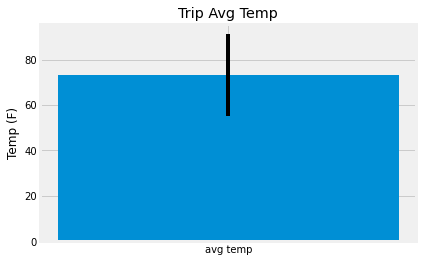

In [36]:
error=[my_holiday_calc[2]-my_holiday_calc[0]]
plt.bar("avg temp", height=my_holiday_calc[1], yerr=error)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")


In [37]:
#==================Daily Rainfall Average=============================

# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#sel = [measurement.station, station.name, station.latitude, station.longitude, station.elevation]
my_trip_rainfall = session.query(measurement.station, measurement.date, station.name, station.latitude, station.longitude, station.elevation, func.sum(measurement.prcp) ).\
                    filter(measurement.station == station.station).\
                    filter(measurement.date <= '2010-11-24' ).\
                    filter(measurement.date >= '2010-10-23').\
                    group_by(measurement.station).all()

my_trip_rainfall

[('USC00511918',
  '2010-10-23',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.6500000000000001),
 ('USC00513117',
  '2010-10-23',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  2.46),
 ('USC00514830',
  '2010-10-23',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.8600000000000003),
 ('USC00516128',
  '2010-10-23',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  22.130000000000006),
 ('USC00517948',
  '2010-10-25',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  0.45999999999999996),
 ('USC00518838',
  '2010-10-24',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  3.4),
 ('USC00519281',
  '2010-10-23',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  6.75),
 ('USC00519397',
  '2010-10-23',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.51),
 ('USC00519523',
  '2010-10-23',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.7

In [38]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [39]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals` 
from datetime import timedelta, date

# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

date_list = []
start_date = date(2010, 10, 24)
end_date = date(2010, 11, 24)
for dt in daterange(start_date, end_date):
    date_list.append(dt.strftime("%m-%d"))
    

date_list


['10-24',
 '10-25',
 '10-26',
 '10-27',
 '10-28',
 '10-29',
 '10-30',
 '10-31',
 '11-01',
 '11-02',
 '11-03',
 '11-04',
 '11-05',
 '11-06',
 '11-07',
 '11-08',
 '11-09',
 '11-10',
 '11-11',
 '11-12',
 '11-13',
 '11-14',
 '11-15',
 '11-16',
 '11-17',
 '11-18',
 '11-19',
 '11-20',
 '11-21',
 '11-22',
 '11-23',
 '11-24']

In [40]:
#identify how many time we need to loop
no_of_days = len(date_list)

In [41]:
print(daily_normals(date_list[1]))

[(68.0, 75.0, 81.0)]


In [42]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
counter = 0

for x in date_list:
    if counter == no_of_days:
        pass
    else:
        normals.append(daily_normals(x))
        counter+=1

In [44]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_list = []
for x in normals:
    for y in x:
        normals_list.append(y)

normals_df = pd.DataFrame(normals_list, columns = ["Min", "Avg", "Max"])
normals_df["Date"] = date_list
normals_df.set_index("Date", inplace=True)
normals_df.head(100)

,Min,Avg,Max
Date,,,
10-24,69.0,74.980392,81.0
10-25,68.0,75.000000,81.0
10-26,68.0,75.173077,81.0
10-27,64.0,75.120000,81.0
10-28,68.0,74.754717,82.0
10-29,68.0,74.886792,81.0
10-30,64.0,74.660000,81.0
10-31,67.0,74.836735,80.0
11-01,65.0,74.862745,83.0


Text(0.5, 1.0, 'Daily Normals 24th Oct to 24th Nov')

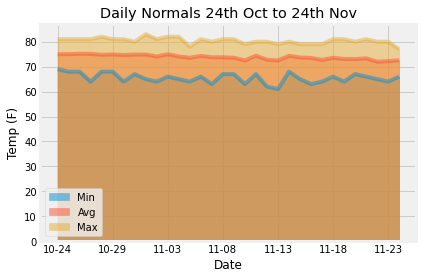

In [45]:
#Plot the dataframe into an area plot
normals_df.plot.area(stacked=False, grid=True)
plt.ylabel("Temp (F)")
plt.title("Daily Normals 24th Oct to 24th Nov")

In [ ]:
#=====End of code=====